## What is LM?

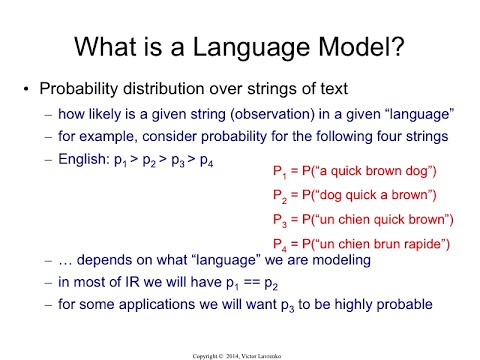

[source](https://www.youtube.com/watch?v=W0TcVrI_vRg)

In [ ]:
# random Language Model
import random
def generate_sentence(ml, N, random_seed=None):
    # Initialize random seed if provided
    if random_seed is not None:
        random.seed(random_seed)

    # Pick a random word from the list
    word = random.choice(ml)

    # Initialize the sentence with the first word
    sentence = [word]

    # Loop to add more words until the desired length is reached
    while len(sentence) < N:
        word = random.choice(ml)
        sentence.append(word)

    # Join the words to form the sentence
    final_sentence = ' '.join(sentence)
    return final_sentence
# Example usage:
ml = sorted(['machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence'])
print('Vocab',ml)
random_seed = 42
N = 8  # Length of the sentence

sentence = generate_sentence(ml, N, random_seed)
print(sentence)


['a', 'artificial', 'intelligence', 'is', 'learning', 'machine', 'of', 'subset']
artificial a learning is is intelligence artificial artificial


Perplexity of a LM is related to its Entropy.

More the entropy, more the perplexity.

$Perplexity = e^{Entropy}$

where $Entropy$ for LMs equals to $\frac{-log(P(w_1, w_2, w_3, ..., w_n))}{n}$

**Then what would be the value of perplexity in terms of probability?**

a) $Perplexity = P(w_1, w_2, w_3, ..., w_n)^{n}$

b) $Perplexity = P(w_1, w_2, w_3, ..., w_n)^{-n}$

c) $Perplexity = P(w_1, w_2, w_3, ..., w_n)^{-1/n}$

c) $Perplexity = P(w_1, w_2, w_3, ..., w_n)^{1/n}$

[source](https://medium.com/@priyankads/perplexity-of-language-models-41160427ed72)

## Classic Techniques

### N-grams

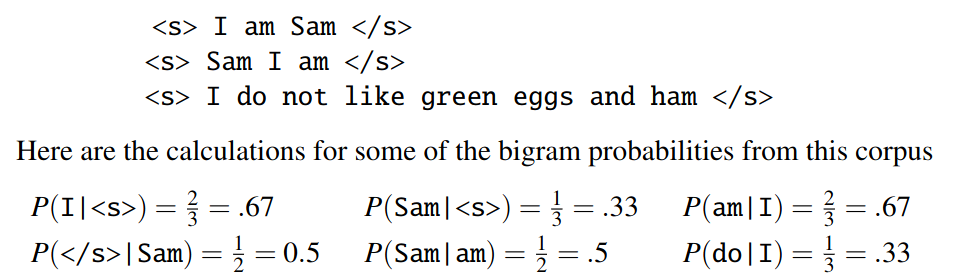

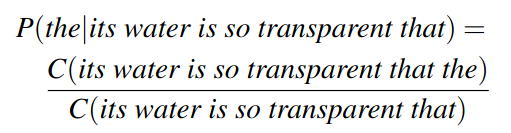

[source](https://web.stanford.edu/~jurafsky/slp3/3.pdf)

#### Why N-gram LMs are still important?

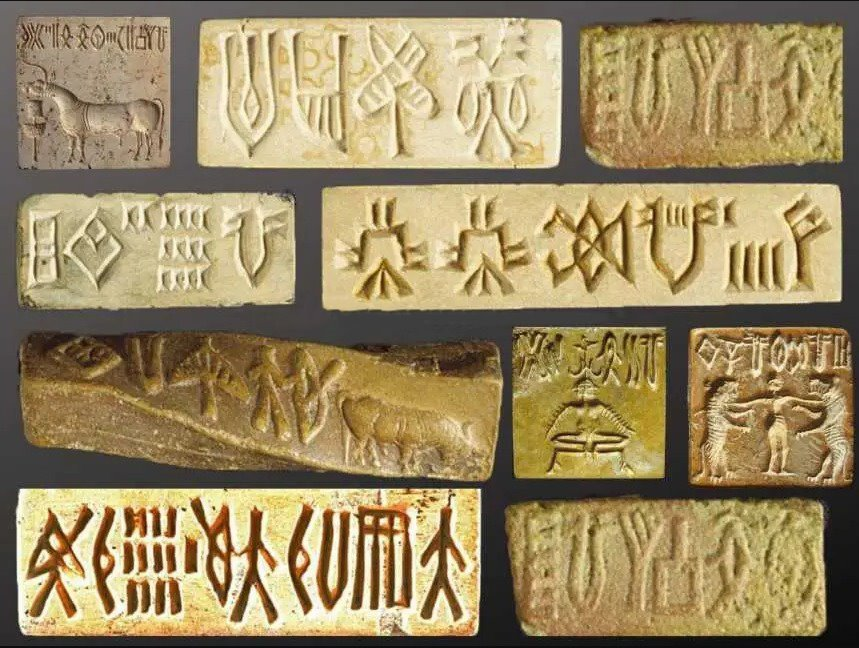

Entropy revealed that Indus valley script is indeed a language [source](https://youtu.be/iF_nJ4vfG-A?t=1373).

#### Code

In [ ]:
# downloads corpus data
!gdown 1uBnHSE5g4jnkD76aVex0h5RpuJnaPFKD
!unzip corpus.zip
import re
import os
import numpy
import glob

textFile = []
for fname in glob.glob('corpus/**/*.txt', recursive=True):
    with open(fname,'r') as f:
        textFile.append(f.read())

In [ ]:
textFile[0]

In [ ]:
# courtesy of https://github.com/burhanharoon/N-Gram-Language-Model

def reverseWords(string):
    if string:
        words = string.split(' ')
        rev = ' '.join(reversed(words))
        return rev


def findCountAtStartOfSentence(word, corpus):
    count = 0
    for sentence in corpus:
        if sentence.startswith(word):
            count += 1
    return count


# Splits file into sentences
def tokenize(file):
    sentences = re.split(r"[.?!]\s+", file)
    return sentences


# Splits a sentence into words
def splitToWords(sentence):
    temp = sentence.split()
    return temp


sentences = []
for files in textFile:
    temp = (tokenize(files))
    for sentence in temp:
        sentences.append(sentence)


words = []

for sentence in sentences:
    for x in splitToWords(sentence):
        words.append(x)

totalWordsCount = len(words)
uniqueWords = set(words)
totalUniqueWordsCount = len(uniqueWords)

# returns the n-grams
def getNGramString(string, ngramNumber):
    string = string.lower()
    string = splitToWords(string)
    if ngramNumber == 1:
        return string
    else:
        totalGrams = [string[0]]
        for index, word in enumerate(string):
            i = index
            toFindProb = ''
            if index > 0 and ngramNumber > 1:
                for j in range(ngramNumber):
                    if i >= 0:
                        toFindProb = toFindProb + string[i]
                        toFindProb += ' '
                        i -= 1
            if toFindProb:
                realWord = toFindProb.strip()
                totalGrams.append(reverseWords(realWord))
        return totalGrams


def findCount(word, corpus):
    count = 0
    for sentence in corpus:
        expression = r"\b" + re.escape(word) + r"\b"
        temp = re.findall(expression, sentence)
        count += len(temp)
    return count


# returns probability of a sentence using bi-gram, product of probabilities of each word conditioned on the previous word(since n=2)
def SentenceProb(sentence, corpus, totalWordsCount):
    ngramString = getNGramString(sentence, 2) # set n here
    sentence = sentence.lower().split()
    totalProbability = []
    probOfFirstWord = findCountAtStartOfSentence(
        sentence[0], corpus)/totalWordsCount
    totalProbability.append(probOfFirstWord)
    for i in range(1, len(sentence)):
        temp = findCount(ngramString[i], corpus)
        if temp:
            result = temp/findCount(sentence[i], corpus)
            totalProbability.append(result)
        else:
            totalProbability.append(0)
    result = numpy.prod(totalProbability)
    return result,totalProbability


# returns smooth probability of a sentence using bi-gram, product of probabilities of each word conditioned on the previous word(since n=2)
# laplace smoothing
def SmoothSentenceProb(sentence, corpus, totalWordsCount, uniqueWords):
    ngramString = getNGramString(sentence, 2) # set n here
    sentence = sentence.lower().split()
    totalProbability = []
    probOfFirstWord = findCountAtStartOfSentence(
        sentence[0], corpus)+1/totalWordsCount+uniqueWords
    totalProbability.append(probOfFirstWord)
    for i in range(1, len(sentence)):
        temp = (findCount(ngramString[i], corpus)+1)
        result = temp/(findCount(sentence[i], corpus)+uniqueWords)
        totalProbability.append(result)
    result = numpy.prod(totalProbability)
    return result,totalProbability


# Calculates perplexity of the sentence
def perplexity(probability, totalWordsCount):
    perplexity = 1/probability
    perplexity = pow(perplexity, totalWordsCount)
    return perplexity


probability,iProbs = SmoothSentenceProb("The batman was a hit",
                                 sentences, totalWordsCount, totalUniqueWordsCount)
probabilityWS,iProbsWS = SentenceProb("The batman was a hit",
                                 sentences, totalWordsCount)


print("WITH SMOOTHING: The probability is: ", probability, "Individual word probs are", iProbs)
print("WITHOUT SMOOTHING: The probability is: ", probabilityWS, "Individual word probs are", iProbsWS)


Then came the wave 🌊 of word Embeddings

### ANN

Next word prediction ❌

Word Embeddings ✅

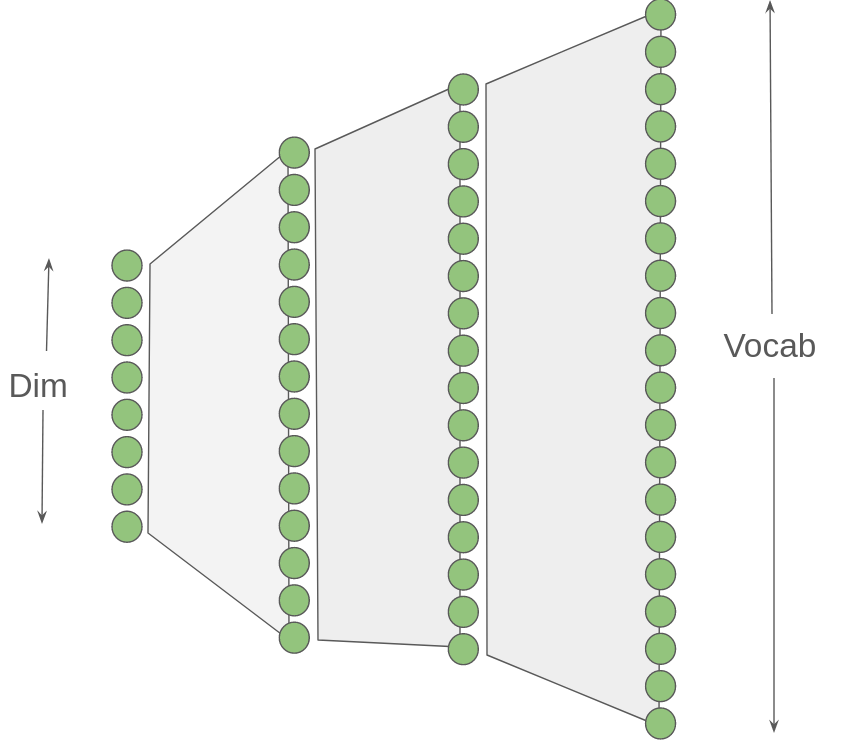

In [ ]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(LinearModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.hidden1 = nn.Linear(embed_dim, embed_dim*2)
        self.hidden2 = nn.Linear(embed_dim*2, embed_dim*3)
        self.vocab_prob = nn.Linear(embed_dim*3, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        # x = x.mean(axis=0)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.vocab_prob(x)
        x = x.softmax(axis=0)
        return x

model = LinearModel(vocab_size=8, embed_dim=100)

model(torch.tensor([1,2,3]))

tensor([[0.2382, 0.2942, 0.3708, 0.3686, 0.3643, 0.2399, 0.2377, 0.3211],
        [0.3644, 0.3228, 0.3335, 0.3315, 0.3328, 0.3590, 0.3521, 0.3038],
        [0.3974, 0.3830, 0.2958, 0.2999, 0.3029, 0.4011, 0.4102, 0.3752]],
       grad_fn=<SoftmaxBackward0>)

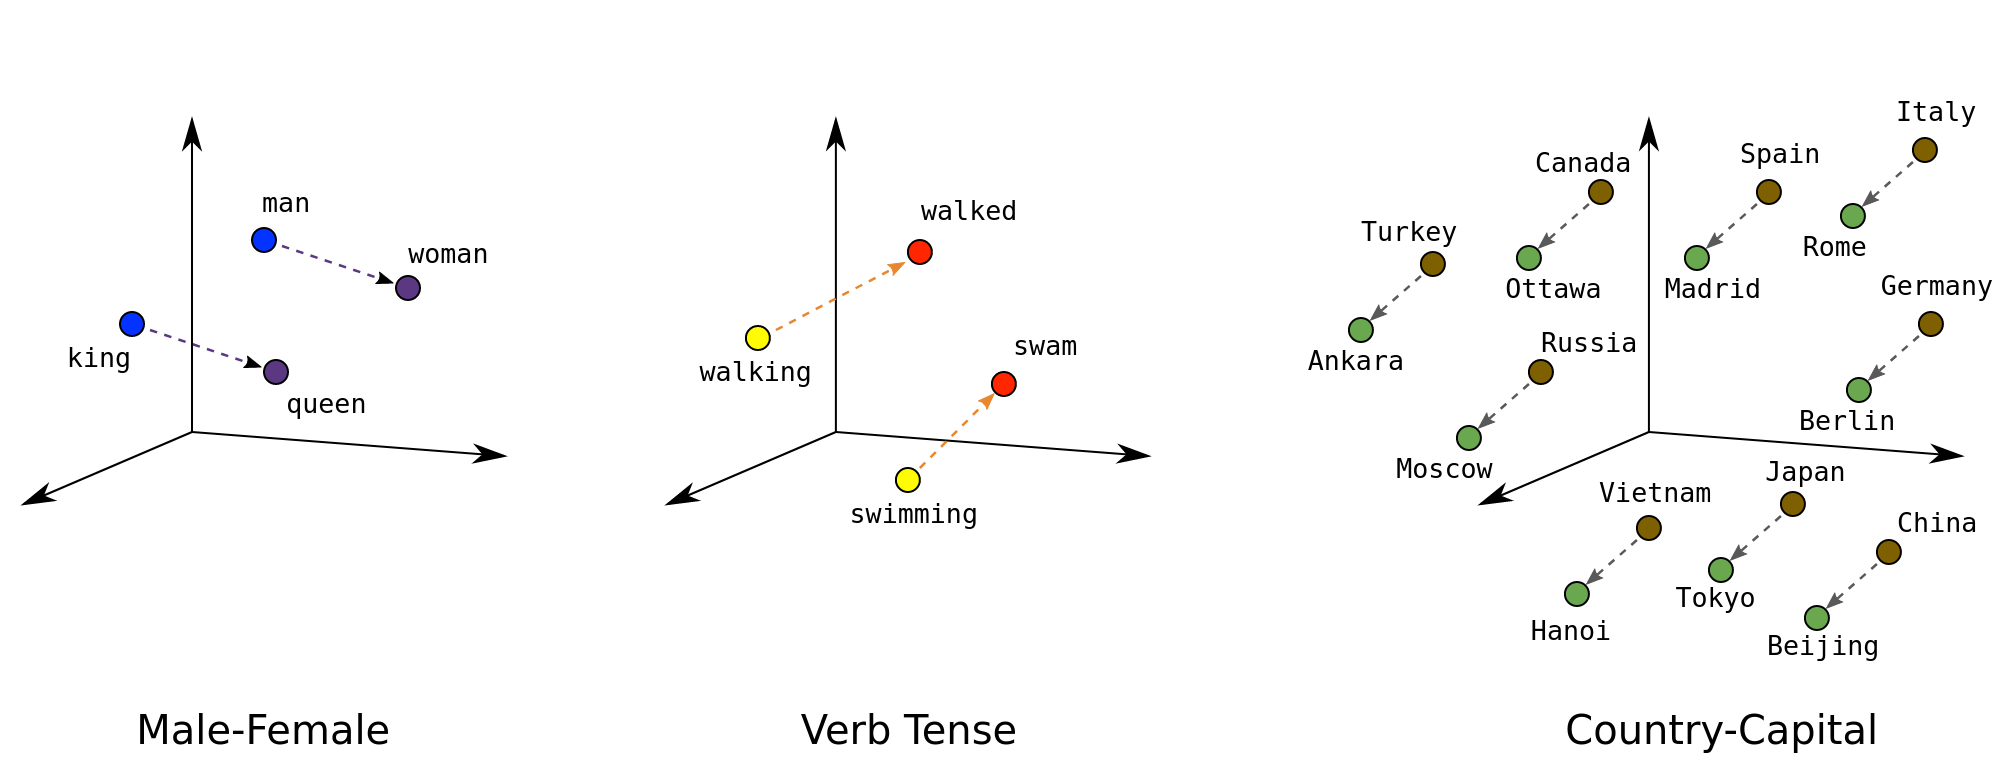

[source](https://developers.google.com/machine-learning/crash-course/embeddings/translating-to-a-lower-dimensional-space)

### RNNs

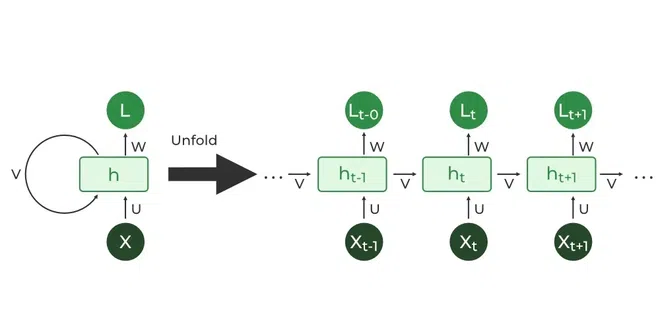

[source](https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/)

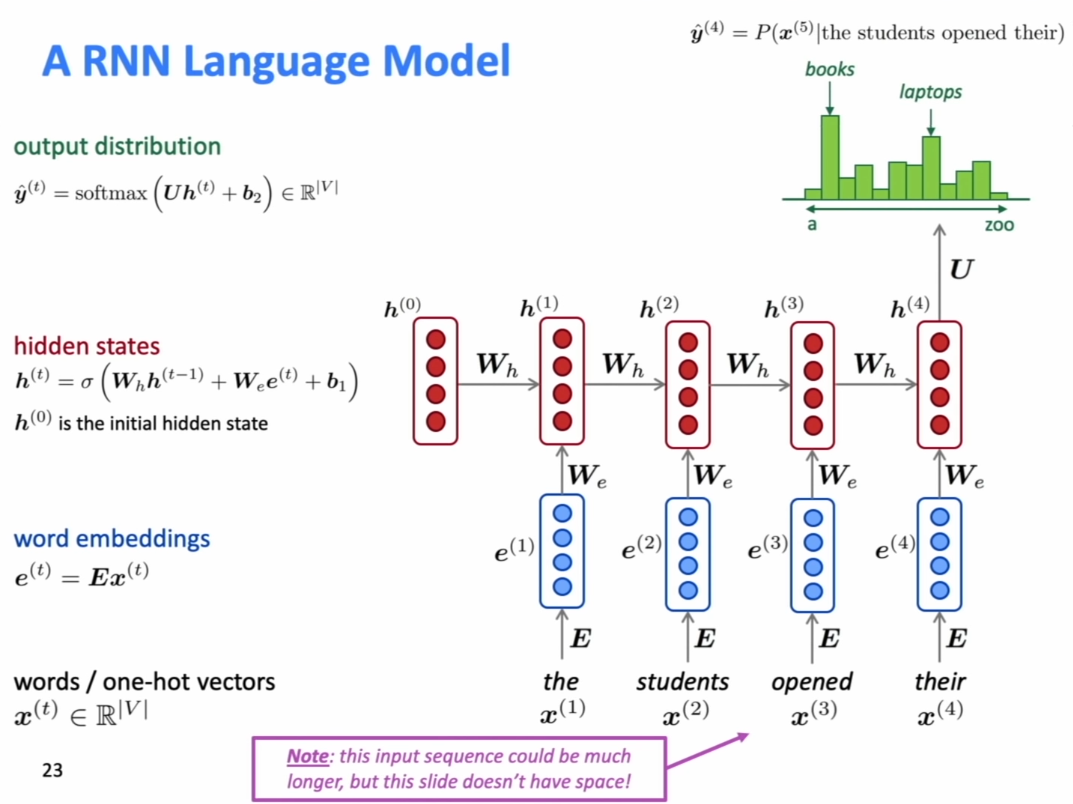

[source](https://youtu.be/iWea12EAu6U?list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&t=1380)

### LSTMs

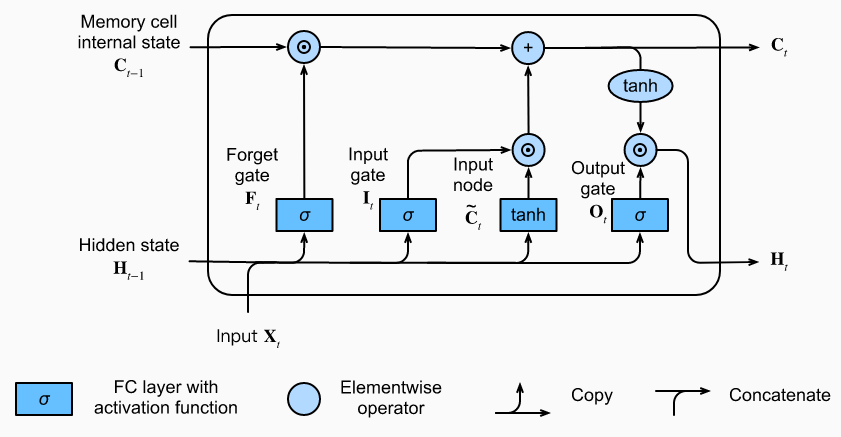
[source](https://d2l.ai/chapter_recurrent-modern/lstm.html)

## Attention



*   Language Modelling ❌
*   Machine Translation ✅



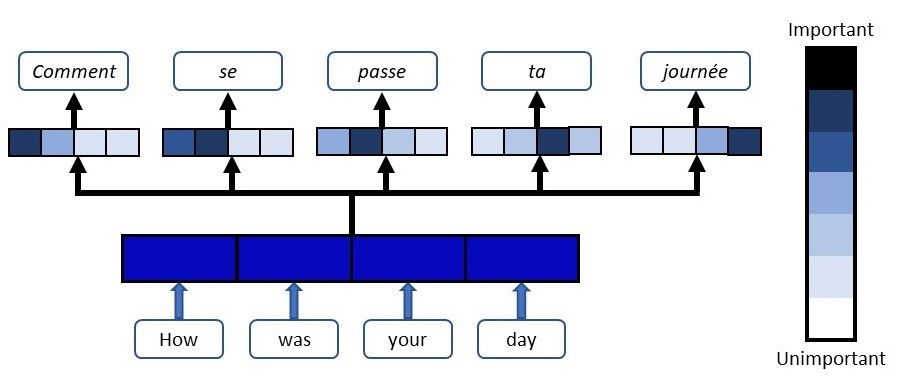

[source](https://blog.floydhub.com/attention-mechanism/)

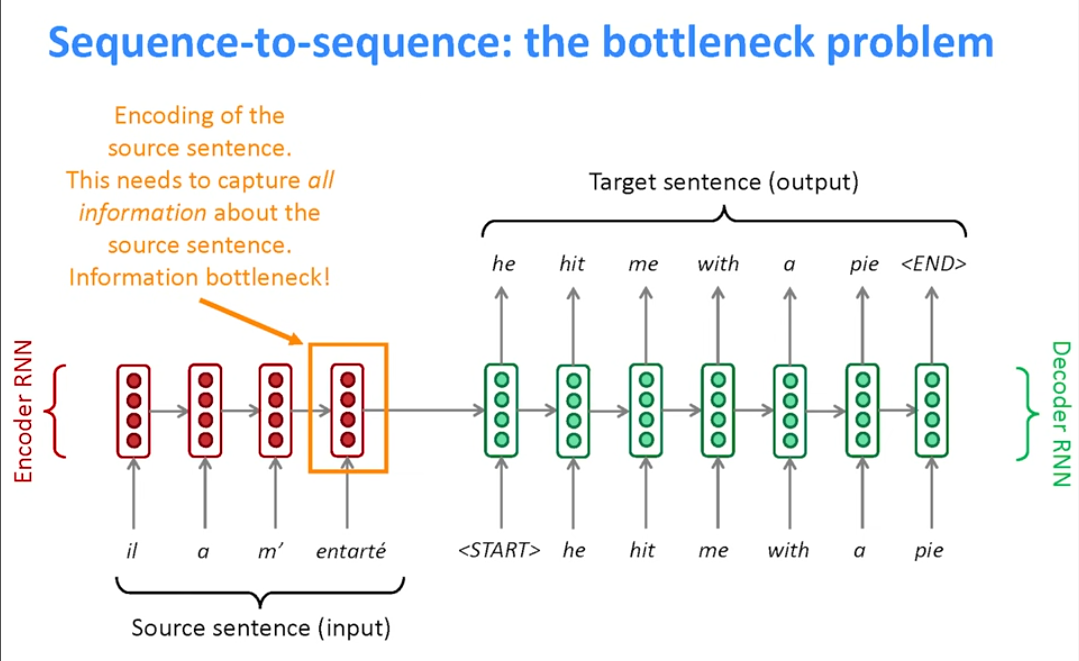

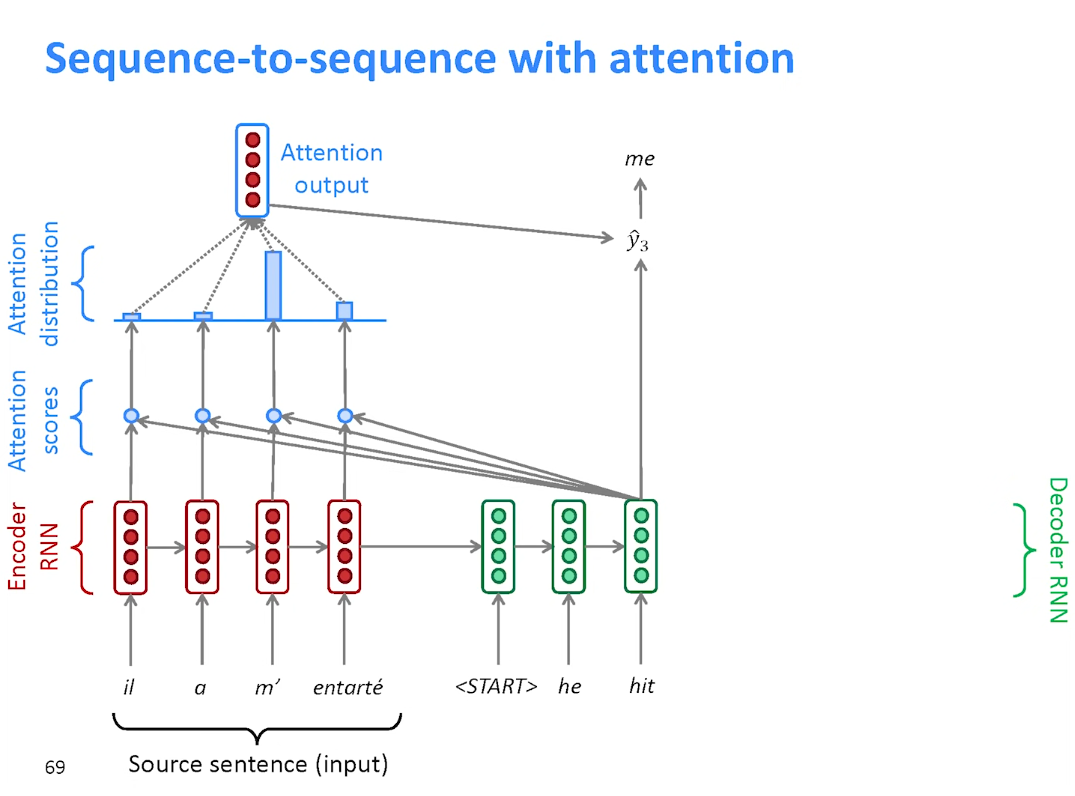

[source](https://youtu.be/XXtpJxZBa2c?list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&t=3734)

### Teacher Forcing

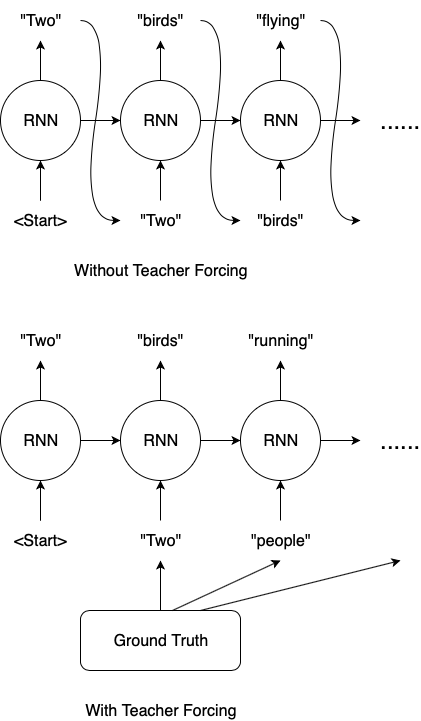

[source](https://towardsdatascience.com/what-is-teacher-forcing-3da6217fed1c)

### Transformers


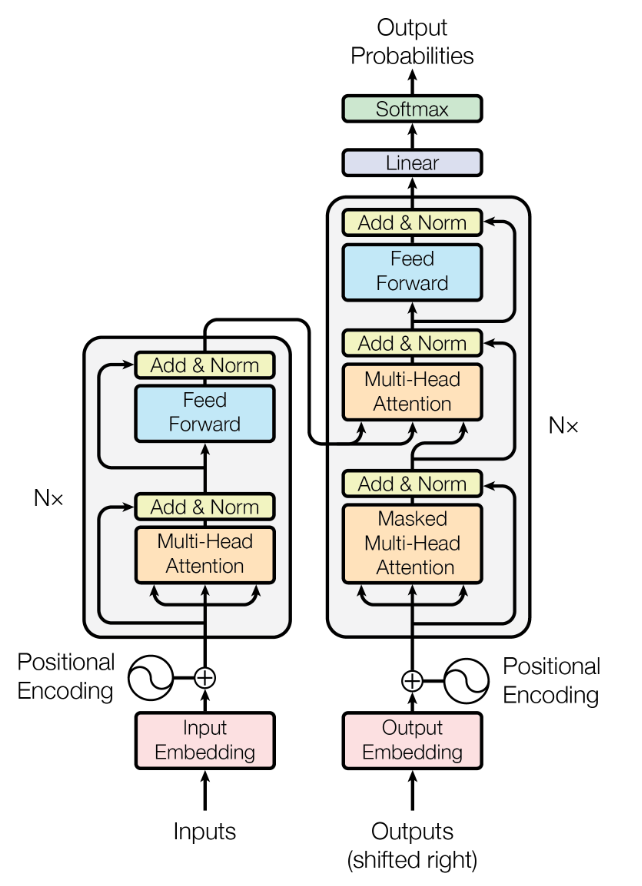

[source](https://arxiv.org/pdf/1706.03762.pdf)

#### Self-Attention

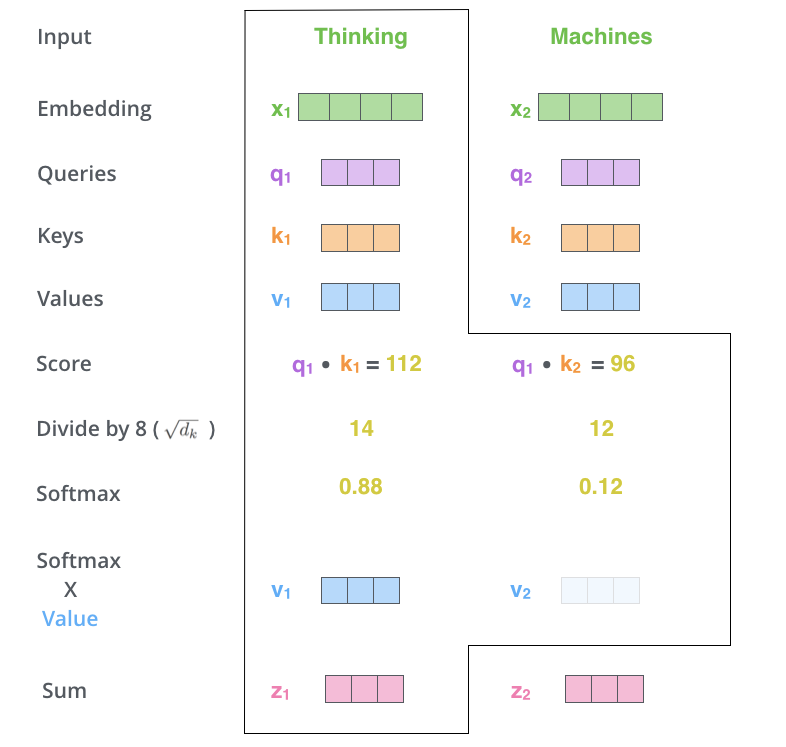

[source](http://jalammar.github.io/illustrated-transformer/)

In [ ]:
import numpy as np
import torch
from torch import nn
import math

class SelfAttention(nn.Module):
    # enc_dev signifies if its a encoder-decoder attention head
    def __init__(self,input_size,query_size,value_size):
        super().__init__()
        self.wq=nn.Linear(input_size,query_size,bias=False) # W_q matrix
        self.wk=nn.Linear(input_size,query_size,bias=False) # W_k matrix
        self.wv=nn.Linear(input_size,value_size,bias=False) # W_v matrix


    # computes the final vectors(z) of each token
    # N -> Batch Size
    # L -> Sequence Lengtj
    # Q -> (N,L,eq)
    # K -> (N,L,ek)
    # V -> (N,L,ev)
    # out -> (N,L,ev)
    def SelfAttention(self,Q,K,V):
        key_size=K.shape[-1]
        out=torch.matmul(Q,torch.transpose(K,1,2))
        # out=torch.div(out,math.sqrt(key_size))
        sft=nn.Softmax(dim=2)
        attention_weights=sft(torch.div(out,math.sqrt(key_size)))
        out=torch.matmul(attention_weights,V)
        return out # Z amtrix consisting of z vectors



    # input -> (N,L,input_size)
    def forward(self,input):

        K_inp=input
        V_inp=input

        # calculating the Q,K,V matrices
        Q=self.wq(input)
        K=self.wk(K_inp)
        V=self.wv(V_inp)


        # computing self attention
        out=self.SelfAttention(Q,K,V)
        return out,Q,K,V


sa=SelfAttention(4,4,2)
i=torch.Tensor(np.random.rand(1,4,4))

print('Input Vectors')
print(i)

data=sa.forward(i)

print('z vectors')
print(data[0])

#### Multi Head Attention

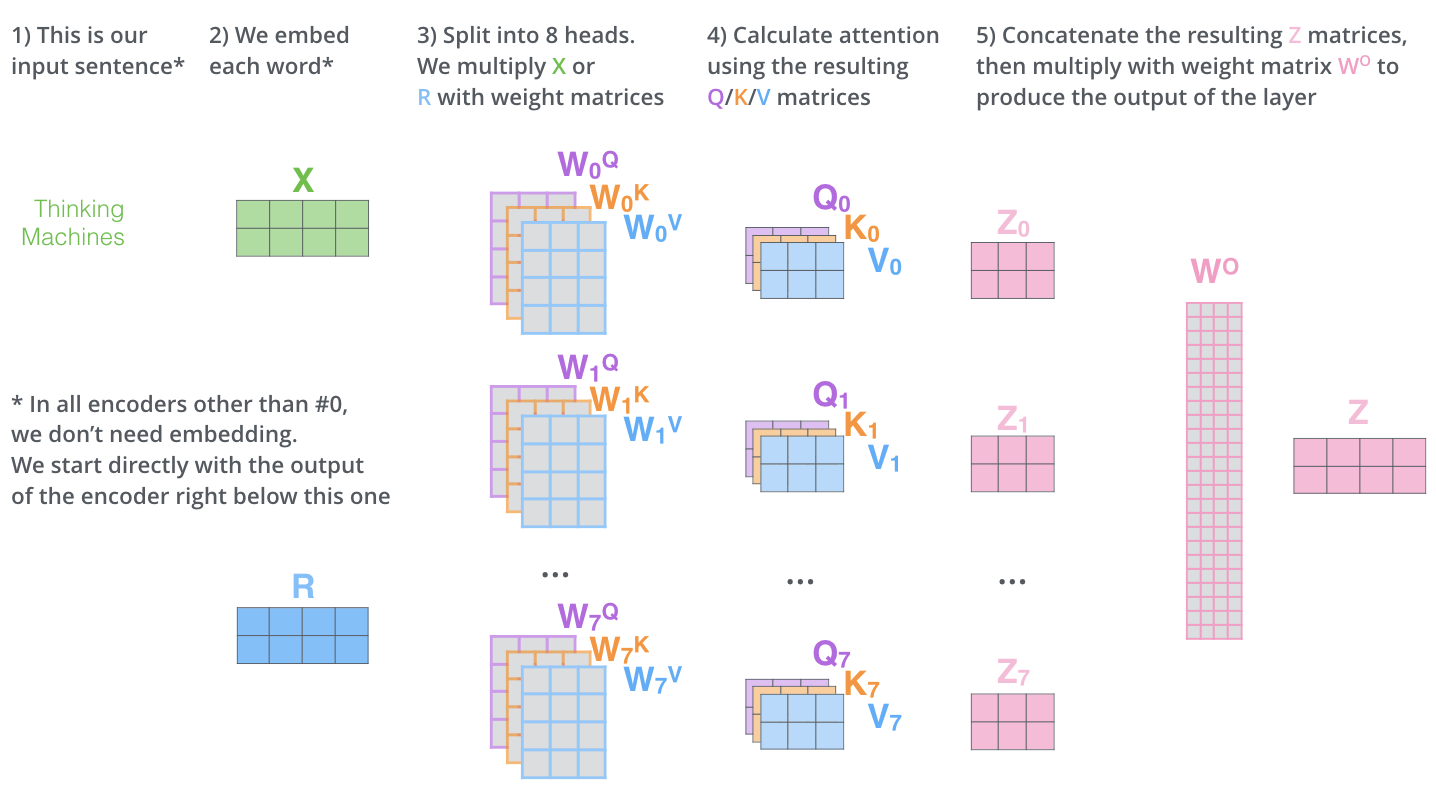

[source](http://jalammar.github.io/illustrated-transformer/)

#### Masked-Multi Head Attention

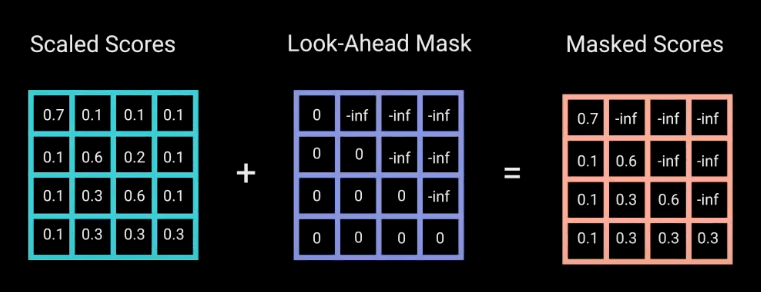

[source](https://blog.yunfeizhao.com/2021/03/31/attention/)

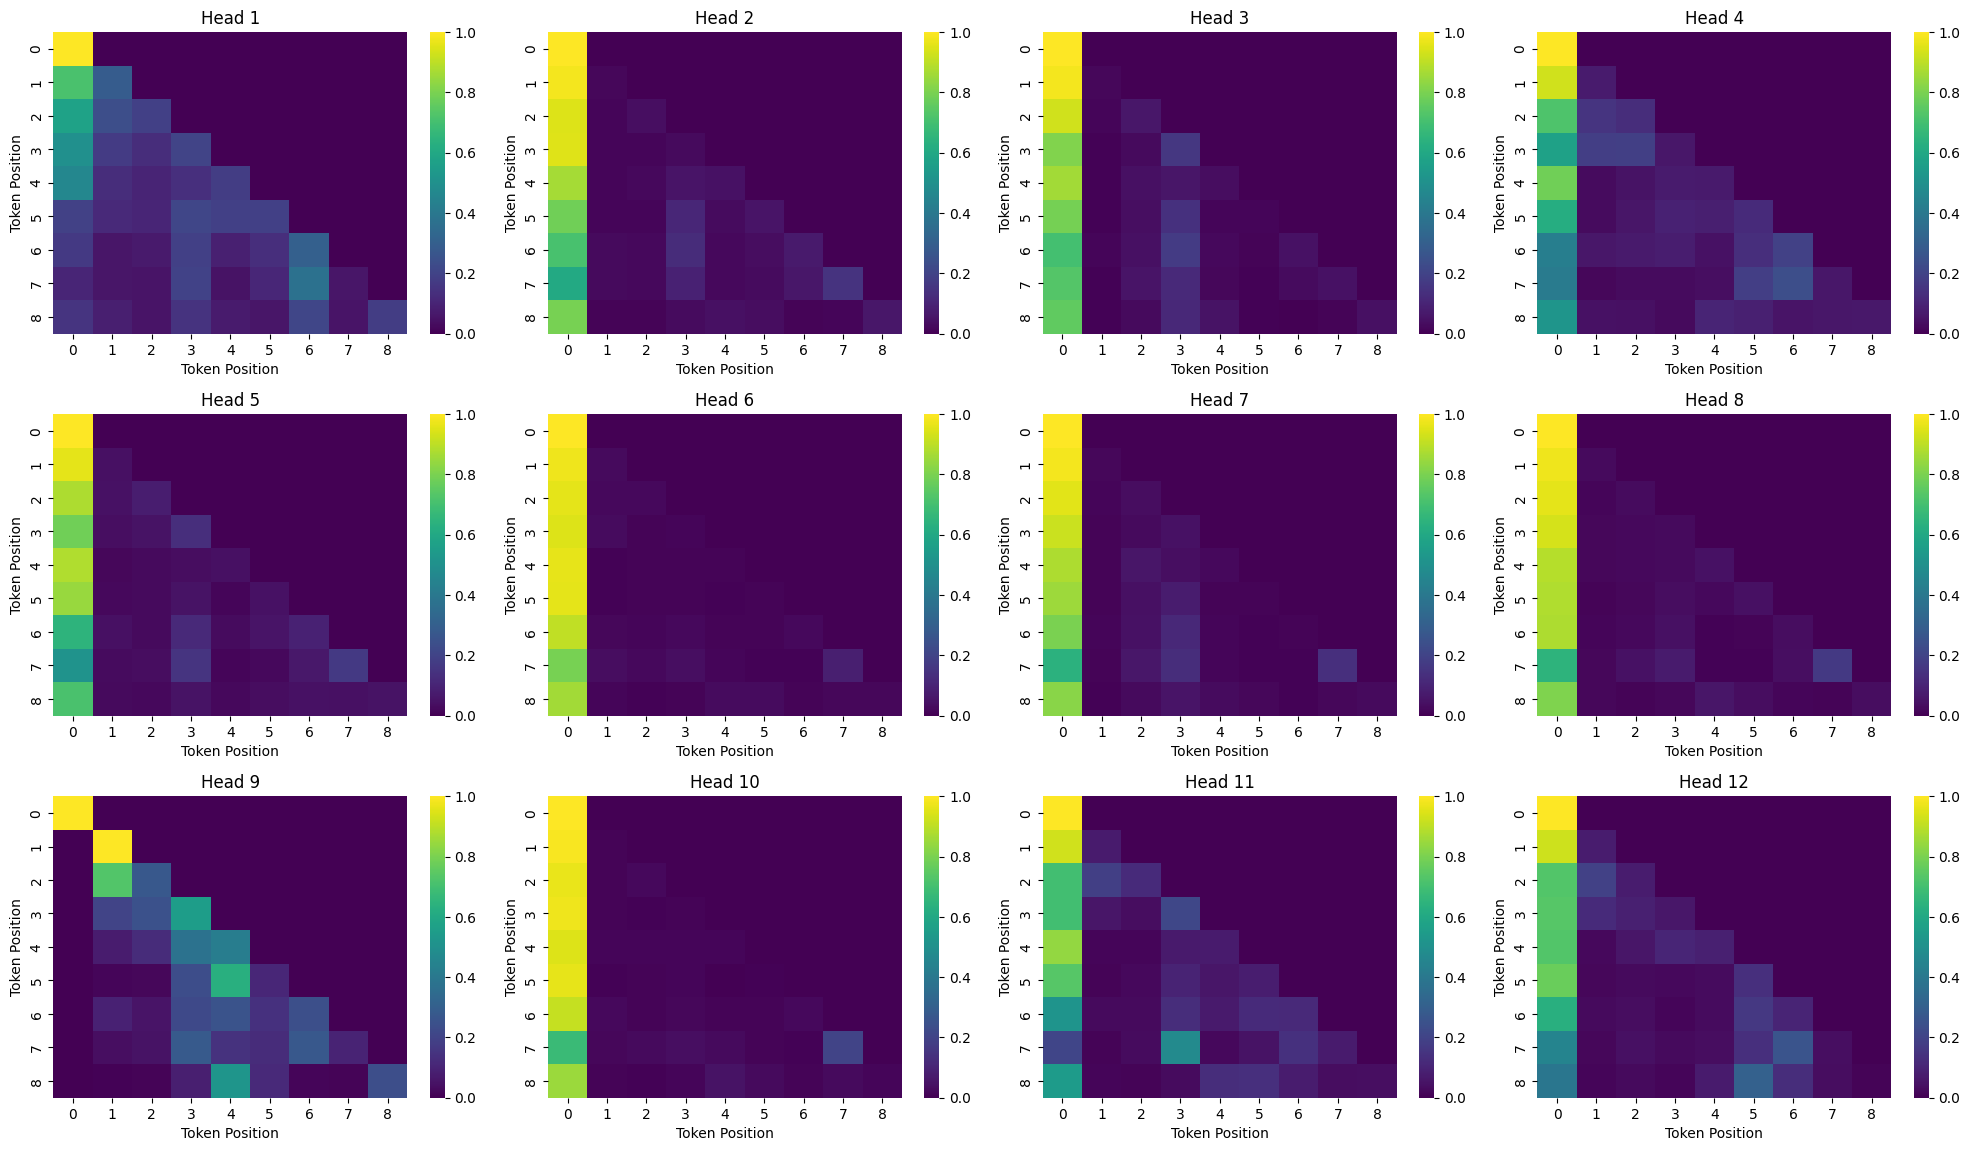

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2", output_attentions=True)
model.eval()  # Set the model to evaluation mode

# Prepare input
input_text = "The quick brown fox jumps over the lazy dog"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Get attention weights
with torch.no_grad():
    outputs = model(input_ids)
    attentions = outputs.attentions  # Get the attention weights

# Extract the final layer's attention weights ([batch_size, num_heads, seq_length, seq_length])
final_layer_attention = attentions[-1].squeeze(0)  # Remove batch dimension, assuming batch size of 1

# Plotting the entire 2D matrix for each head in the final layer
num_heads = final_layer_attention.size(0)
seq_length = final_layer_attention.size(-1)

# Determine grid size for plotting
grid_size = int(num_heads ** 0.5)
if grid_size ** 2 < num_heads:
    grid_size += 1

plt.figure(figsize=(20, 15))
for i in range(num_heads):
    plt.subplot(grid_size, grid_size, i+1)
    sns.heatmap(final_layer_attention[i].detach().numpy(), cmap='viridis', annot=False)
    plt.title(f'Head {i+1}')
    plt.xlabel('Token Position')
    plt.ylabel('Token Position')

plt.tight_layout()
plt.show()


#### Positional Encodings

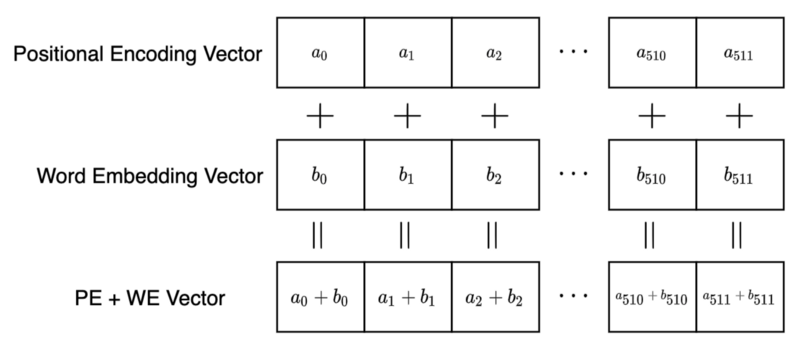

[source](https://kikaben.com/transformers-positional-encoding/)

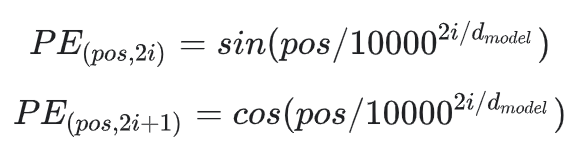

[source](https://stackoverflow.com/questions/63295569/explanation-about-i-2-in-positional-encoding-in-tensorflow-tutorial-about-trans)

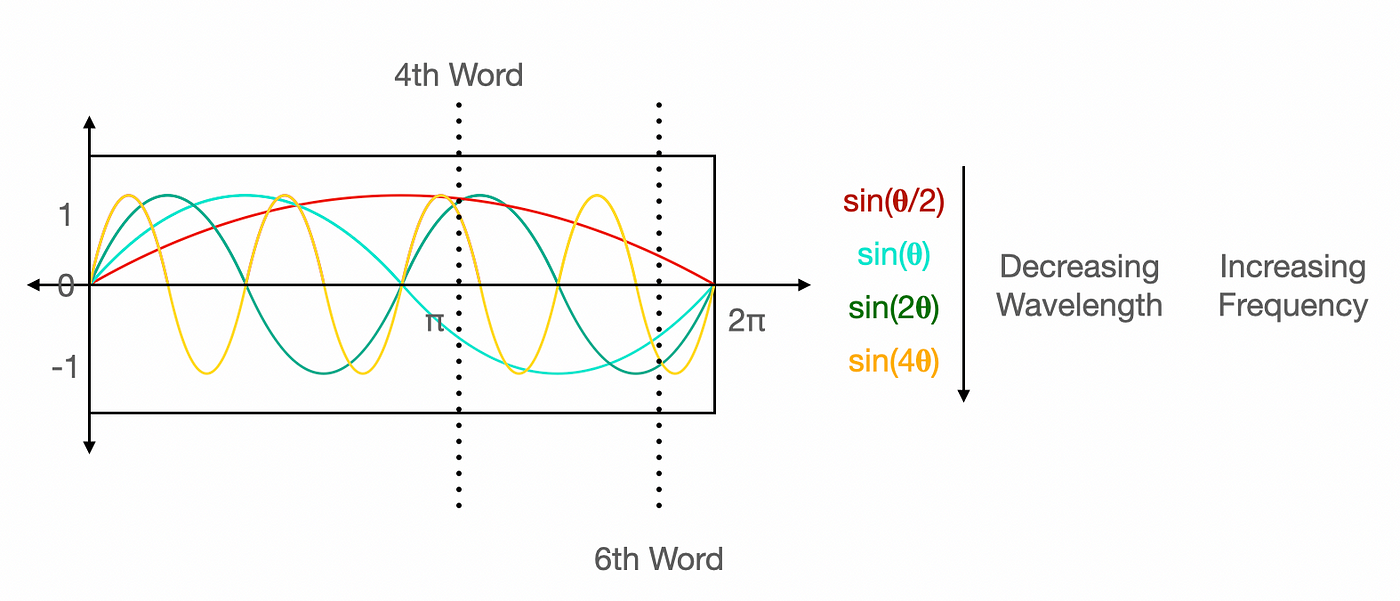

[source](https://lih-verma.medium.com/positional-embeddings-in-transformer-eab35e5cb40d)

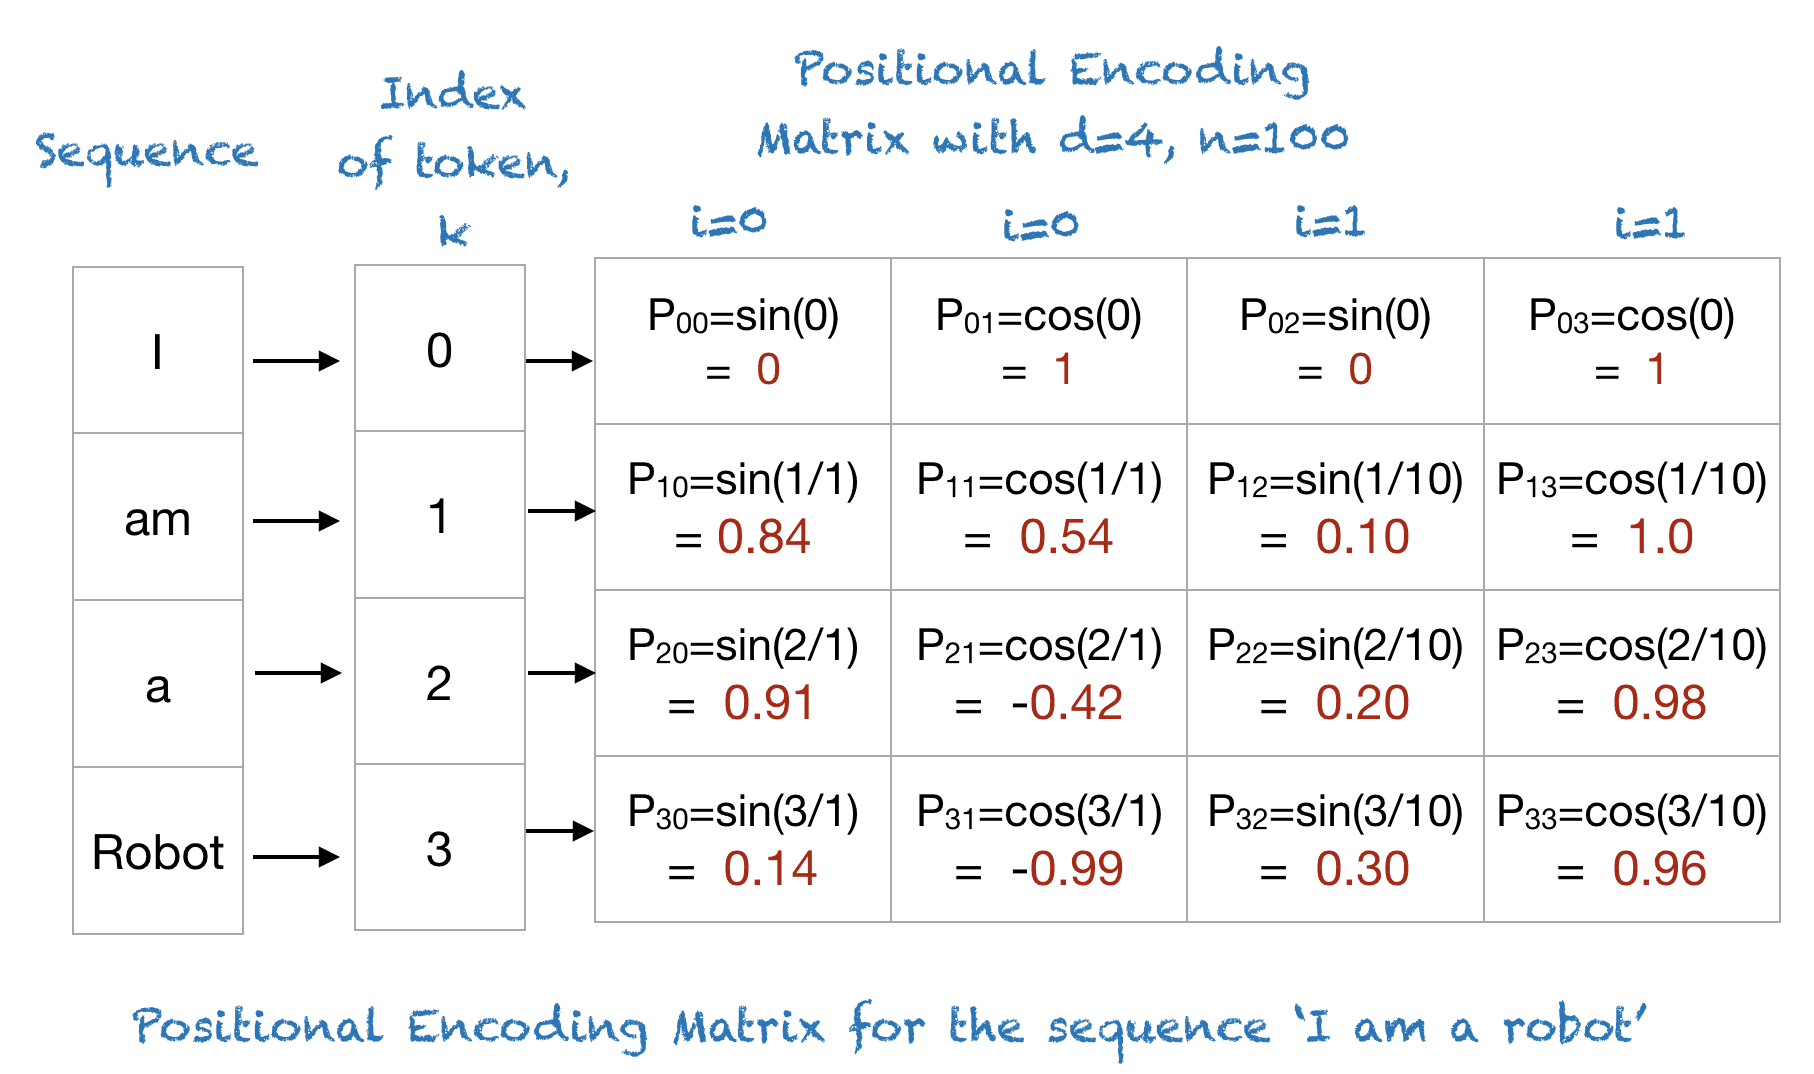

[source](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)

In [ ]:
import numpy as np
import torch
from torch import nn
import math

# max sequence length is 750
class PosEncoding(nn.Module):
    def __init__(self, input_size, max_seq_length=750):
        super().__init__()

        pe = torch.zeros(max_seq_length, input_size)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, input_size, 2).float() * -(math.log(10000.0) / input_size))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.pe=pe.unsqueeze(0)

    # x -> (N,L,input_size)
    def forward(self, x):
        c=torch.add(x,self.pe[:, :x.size(1)])
        return c

pe=PosEncoding(10)

i=torch.Tensor(np.random.rand(1,4,10))

print('Input Vectors')
print(i)

data=pe.forward(i)

print('positionally encoded vectors')
print(data)

#### Tokenization
https://huggingface.co/docs/transformers/en/tokenizer_summary

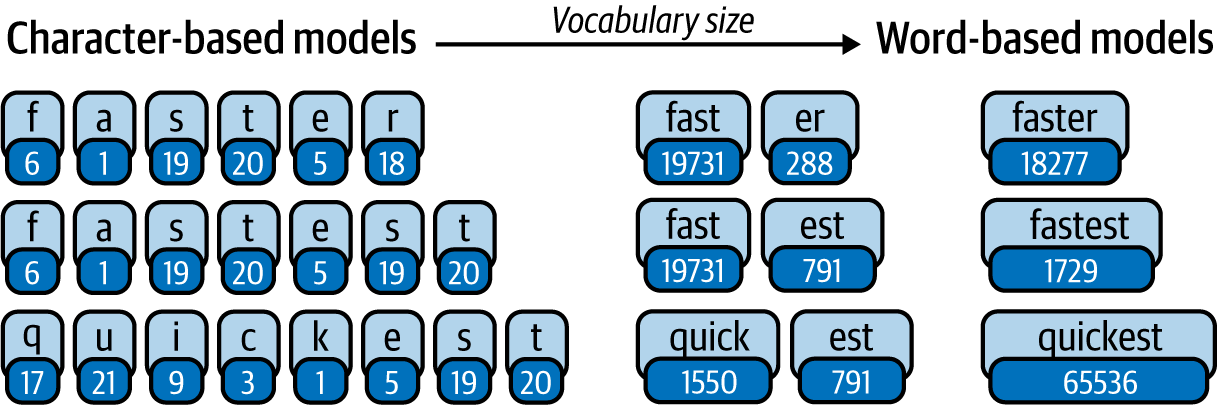

[source](https://www.oreilly.com/library/view/applied-natural-language/9781492062561/ch04.html)

[importance of subword tokenizers](https://www.youtube.com/watch?v=zHvTiHr506c)

In [ ]:
!pip install -q datasets
# !wget https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-raw-v1.zip
# !unzip wikitext-103-raw-v1.zip



from datasets import load_dataset

dataset = load_dataset("wikitext",'wikitext-103-raw-v1')

train_dataset = dataset['train']
test_dataset = dataset['test']
val_dataset = dataset['validation']


# Iterator using the text form complex_sentence
def iterator_wiki(train_dataset, test_dataset, val_dataset):
  for mydataset in [train_dataset, test_dataset, val_dataset]:
    for data in mydataset:
      yield data['text']


In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import BPE,WordPiece
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import BpeTrainer,WordPieceTrainer

##### BPE

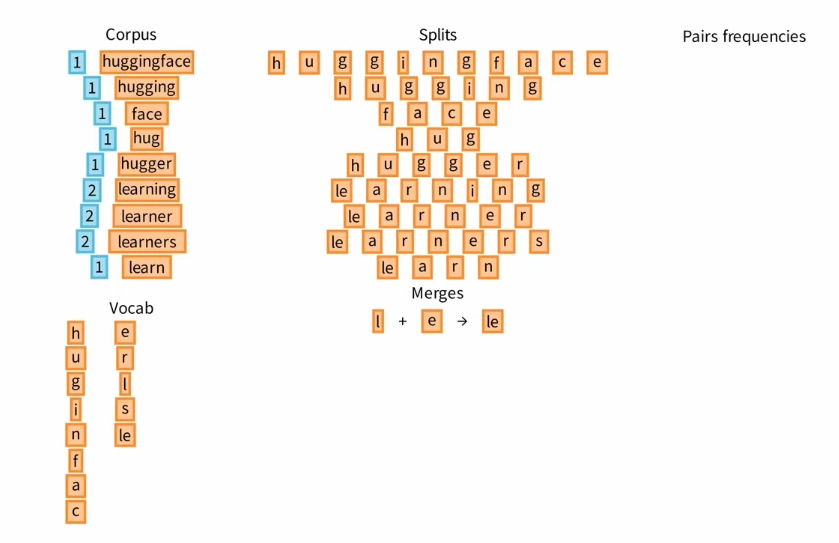

[Source](https://www.youtube.com/watch?v=HEikzVL-lZU)

GPT, RoBERTa

In [ ]:

tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])


tokenizer.pre_tokenizer = Whitespace()

# files = [f"data/wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]
tokenizer.train_from_iterator(iterator_wiki(
    train_dataset, test_dataset, val_dataset), trainer=trainer)

# tokenizer.save("data/tokenizer-wiki.json")
# tokenizer = Tokenizer.from_file("data/tokenizer-wiki.json")

output = tokenizer.encode("Hello, y'all! How are you 😁 ?")

print(output.tokens)
# ["Hello", ",", "y", "'", "all", "!", "How", "are", "you", "[UNK]", "?"]

print(output.ids)
# [27253, 16, 93, 11, 5097, 5, 7961, 5112, 6218, 0, 35]

['Hello', ',', 'y', "'", 'all', '!', 'How', 'are', 'you', '[UNK]', '?']
[27253, 16, 93, 11, 5097, 5, 7961, 5112, 6218, 0, 35]


##### Wordpiece

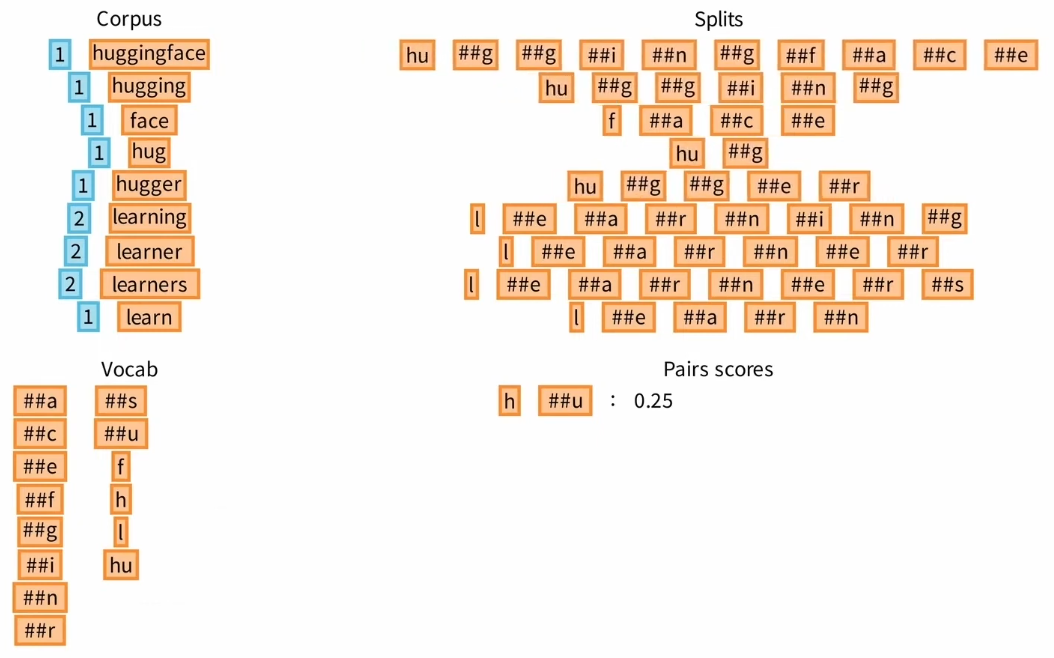
[Source](https://www.youtube.com/watch?v=qpv6ms_t_1A)

BERT

**Will this work for Chinese and Japanese? They have no spaces**

[SentencePiece](https://www.youtube.com/watch?v=hL4ZnAWSyuU)

[Unigram tokenization](https://www.youtube.com/watch?v=TGZfZVuF9Yc)

In [ ]:
tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))
trainer = WordPieceTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])


tokenizer.pre_tokenizer = Whitespace()

# files = [f"data/wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]
tokenizer.train_from_iterator(iterator_wiki(
    train_dataset, test_dataset, val_dataset), trainer=trainer)

# tokenizer.save("data/tokenizer-wiki.json")
# tokenizer = Tokenizer.from_file("data/tokenizer-wiki.json")

output = tokenizer.encode("Hello, y'all! How are you 😁 ?")

print(output.tokens)


print(output.ids)

['Hell', '##o', ',', 'y', "'", 'all', '!', 'How', 'are', 'you', '[UNK]', '?']
[15338, 5020, 16, 93, 11, 9007, 5, 11835, 8891, 9491, 0, 35]


### Pretraining and Fine-tuning

![img](https://production-media.paperswithcode.com/methods/new_BERT_Overall.jpg)

[source](https://paperswithcode.com/method/bert)

### Decoding Schemes

Code [![img](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/huggingface/blog/blob/main/notebooks/02_how_to_generate.ipynb#scrollTo=w4CYi91h11yd)

**Greedy search** simply selects the word with the highest probability as its next word: $w_t = argmax_{w}P(w | w_{1:t-1})$ at each timestep $t$. The following sketch shows greedy search.

![Greedy Search](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/greedy_search.png)

Starting from the word $\text{"The"}$, the algorithm
greedily chooses the next word of highest probability $\text{"nice"}$ and so on, so that the final generated word sequence is $\text{"The", "nice", "woman"}$ having an overall probability of $0.5 \times 0.4 = 0.2$.

In the following we will generate word sequences using GPT2 on the context $(\text{"I", "enjoy", "walking", "with", "my", "cute", "dog"})$.

**Beam search** reduces the risk of missing hidden high probability word sequences by keeping the most likely `num_beams` of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability. Let's illustrate with `num_beams=2`:

![Beam search](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/beam_search.png)

At time step $1$, besides the most likely hypothesis $\text{"The", "nice"}$, beam search also keeps track of the second most likely one $\text{"The", "dog"}$. At time step $2$, beam search finds that the word sequence $\text{"The", "dog", "has"}$ has with $0.36$ a higher probability than $\text{"The", "nice", "woman"}$, which has $0.2$. Great, it has found the most likely word sequence in our toy example!

Beam search will always find an output sequence with higher probability than greedy search, but is not guaranteed to find the most likely output.

**Top-K Sampling**

[Fan et. al (2018)](https://arxiv.org/pdf/1805.04833.pdf) introduced a simple, but very powerful sampling scheme, called ***Top-K*** sampling. In *Top-K* sampling, the *K* most likely next words are filtered and the probability mass is redistributed among only those *K* next words.
GPT2 adopted this sampling scheme, which was one of the reasons for its success in story generation.

We extend the range of words used for both sampling steps in the example above from 3 words to 10 words to better illustrate *Top-K* sampling.

![top_k_sampling](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/top_k_sampling.png)

Having set $K = 6$, in both sampling steps we limit our sampling pool to 6 words. While the 6 most likely words, defined as $V_{\text{top-K}}$ encompass only *ca.* two-thirds of the whole probability mass in the first step, it includes almost all of the probability mass in the second step. Nevertheless, we see that it successfully eliminates the rather weird candidates $\text{"not", "the", "small", "told"}$
in the second sampling step.

**Top-p (nucleus) sampling**

Instead of sampling only from the most likely *K* words, in *Top-p* sampling chooses from the smallest possible set of words whose cumulative probability exceeds the probability *p*. The probability mass is then redistributed among this set of words. This way, the size of the set of words (*a.k.a* the number of words in the set) can dynamically increase and decrease according to the next word's probability distribution. Ok, that was very wordy, let's visualize.

![top_p_sampling](https://github.com/patrickvonplaten/scientific_images/blob/master/top_p_sampling.png?raw=true)

Having set $p=0.92$, *Top-p* sampling picks the *minimum* number of words to exceed together $p=92\%$ of the probability mass, defined as $V_{\text{top-p}}$. In the first example, this included the 9 most likely words, whereas it only has to pick the top 3 words in the second example to exceed 92%. Quite simple actually! It can be seen that it keeps a wide range of words where the next word is arguably less predictable, *e.g.* $P(w | \text{"The"})$, and only a few words when the next word seems more predictable, *e.g.* $P(w | \text{"The", "car"})$.

**Temperature**

Softmax $s(x_i) = \frac{e^{x_i}}{\sum_{j}{e^{x_j}}}$

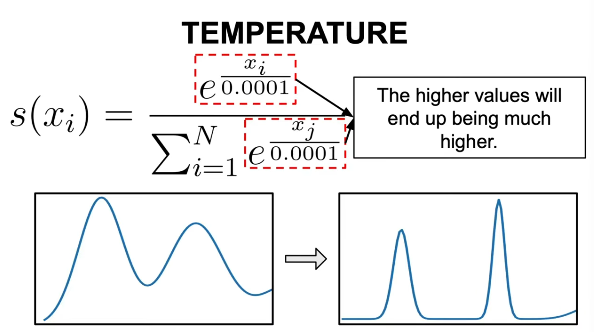

[source](https://www.youtube.com/watch?v=-BBulGM6xF0)


## LLM

The loss scales as a power-law with model size, dataset size, and the amount of compute used for training. Increase model size 10 times, then increase data size by 2 times.

*Kaplan, Jared, et al. "Scaling laws for neural language models." arXiv preprint arXiv:2001.08361 (2020).*

Actually increase data by 10 times. Instead of bigger model, use more data and bigger batch size (compute).

*Hoffmann, Jordan, et al. "Training compute-optimal large language models." arXiv preprint arXiv:2203.15556 (2022).*

Careful data pruning can help. [source](https://www.youtube.com/watch?v=iNcsP3xFmJc).



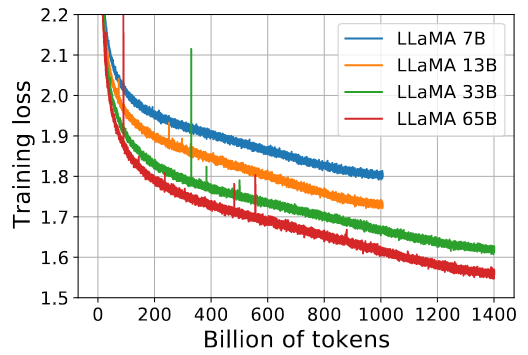

[source](https://arxiv.org/pdf/2302.13971.pdf)

Engineering tricks used in Llama paper:

1.   Pre-normalization
2.   SwiGLU activation function
3.   Rotary Embeddings (RoPE)
4.   Gradient clipping
5.   Custom function for gradient backprop

65B parameter model needs 21 days to train on two thousand A100 GPU with 1.4T tokens.

Each GPU is 80 GB in size and 1.2 million INR in cost.



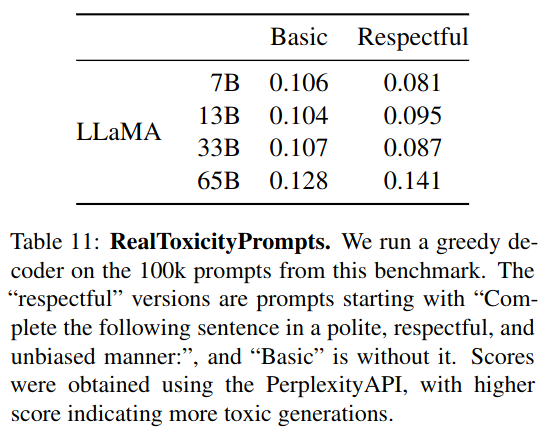

[insight source](https://youtu.be/E5OnoYF2oAk?si=PZdAoepZcn0o7Dhw)

## Instruction following LLMs

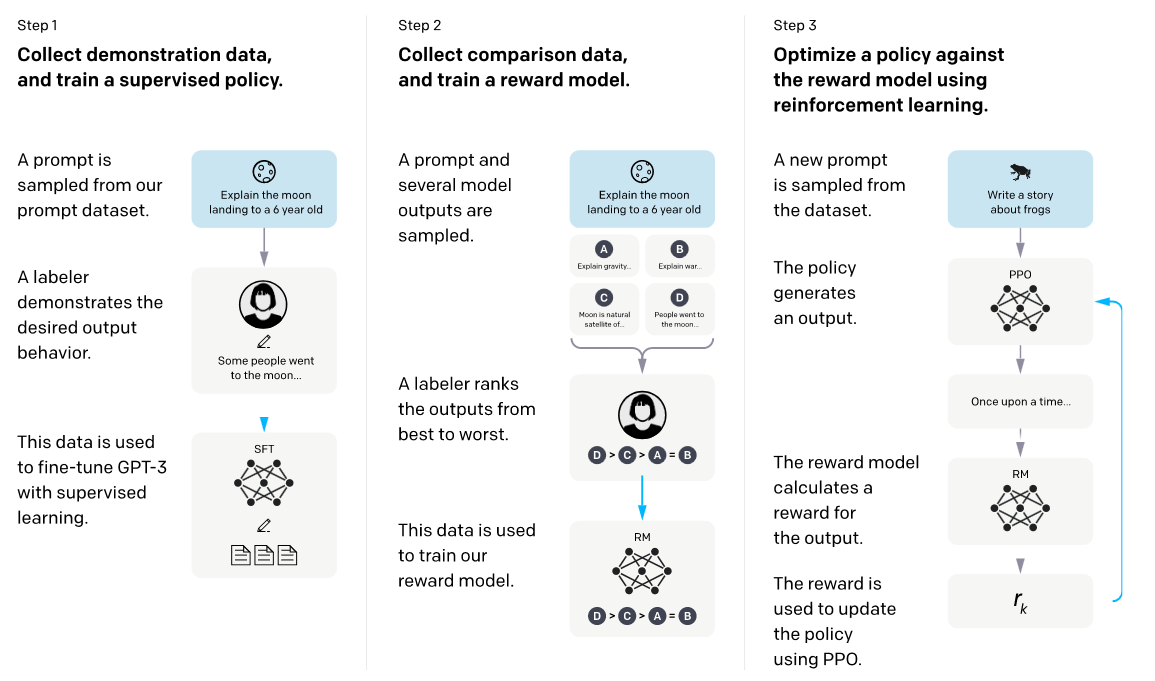

[source](https://arxiv.org/pdf/2203.02155.pdf)

## RLHF

![img](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/blog/rlhf/reward-model.png)

[source](https://huggingface.co/blog/rlhf)

**Question: But why rank them manually? Why not simply giving it a score?**

### RL Basics

Types of learning:

1. Supervised
2. Unsupervised
3. Reinforcement

**Why reinforcement learning is a separate category? What is its use?**

![img](https://www.researchgate.net/profile/Jacob-Rafati/publication/328494763/figure/fig1/AS:685464273047554@1540438826831/The-agent-environment-interaction-in-reinforcement-learning.ppm)

[source](https://www.researchgate.net/figure/The-agent-environment-interaction-in-reinforcement-learning_fig1_328494763)

The Policy π is the brain of our Agent, it’s the function that tells us what action to take given the state we are in.

A policy is a “learned strategy” that governs the agents’ behaviour in selecting an action at a particular time t of the Environment ([source](https://ekababisong.org/key-concepts-of-modern-reinforcement-learning/)).

There are two approaches to train our agent to find this optimal policy π*:

* **Directly**, by teaching the agent to learn which **action to take**, given the current state: Policy-Based Methods. It will learn a policy function that will define a mapping from each state to the best corresponding action.
* **Indirectly**, **teach the agent to learn which state is more valuable** and then take the action that leads to the more valuable states: Value-Based Methods. In value-based methods, instead of learning a policy function, we learn a value function (denoted Q* or V*) that maps a state to the expected value of being at that state. ([more details here](https://huggingface.co/learn/deep-rl-course/unit1/two-methods)) Since the policy is not trained/learned, we need to specify its behavior. For instance, if we want a policy that, given the value function, will take actions that always lead to the biggest reward, we’ll create a Greedy Policy ([source](https://huggingface.co/learn/deep-rl-course/unit2/two-types-value-based-methods)).
* Actor-critic method is a combination of value-based and policy-based methods.

PO: Policy Optimization is done using using gradient ascent on objective function.

PPO: Proximal Policy Optimization is the use of PO on a clipped objective function. It will constrain the policy change in a small range.

[Course on DeepRL](https://huggingface.co/learn/deep-rl-course/unit0/introduction)

PPO resources: [source1](https://fse.studenttheses.ub.rug.nl/25709/1/mAI_2021_BickD.pdf), [source2](https://arxiv.org/pdf/2307.04964.pdf)

### PPO Applications

Detoxify Language Models [link](https://huggingface.co/docs/trl/en/detoxifying_a_lm) [![img](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/10rsrwjGhENOQezab3VIQ0mOCYYTjLXNb?usp=sharing)

Generate positive reviews [source](https://colab.research.google.com/github/CarperAI/trlx/blob/main/examples/notebooks/trlx_sentiments.ipynb)

ILQL resource [link](https://sea-snell.github.io/ILQL_site/)

## Prompting

In [ ]:
# prashant fine-tuning notebooks

### Zero-shot vs Few-shot vs In-context

![img](https://machinelearningmastery.com/wp-content/uploads/2023/05/GPT4All-zeroshot.png)

![img](https://machinelearningmastery.com/wp-content/uploads/2023/05/GPT4All-fewshot-1024x741.png)
[source](https://machinelearningmastery.com/what-are-zero-shot-prompting-and-few-shot-prompting/)

In-context

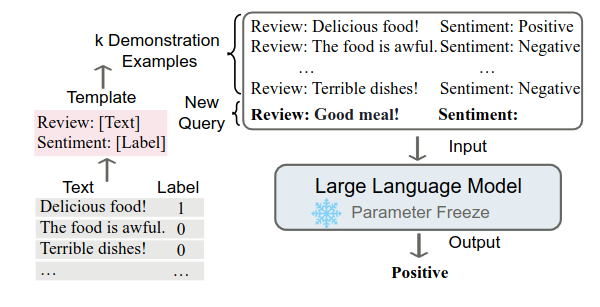

[source](https://arxiv.org/pdf/2301.00234.pdf)

Incontext learning is a paradigm that allows language models to learn tasks given only a few examples in the form of demonstration. Few-shot learning is a general machine learning approach that uses parameter adaptation to learn the best model parameters for the task with a limited number of supervised examples (Wang and Yao, 2019). In contrast, ICL does not require parameter updates and is directly performed on pretrained LLMs. [source](https://genai.stackexchange.com/a/648)

Though it has been observed that performance does not vary much between few-shot and in-context.

*Mosbach, Marius, et al. "Few-shot Fine-tuning vs. In-context Learning: A Fair Comparison and Evaluation." arXiv preprint arXiv:2305.16938 (2023).*

### Chain of thought prompting

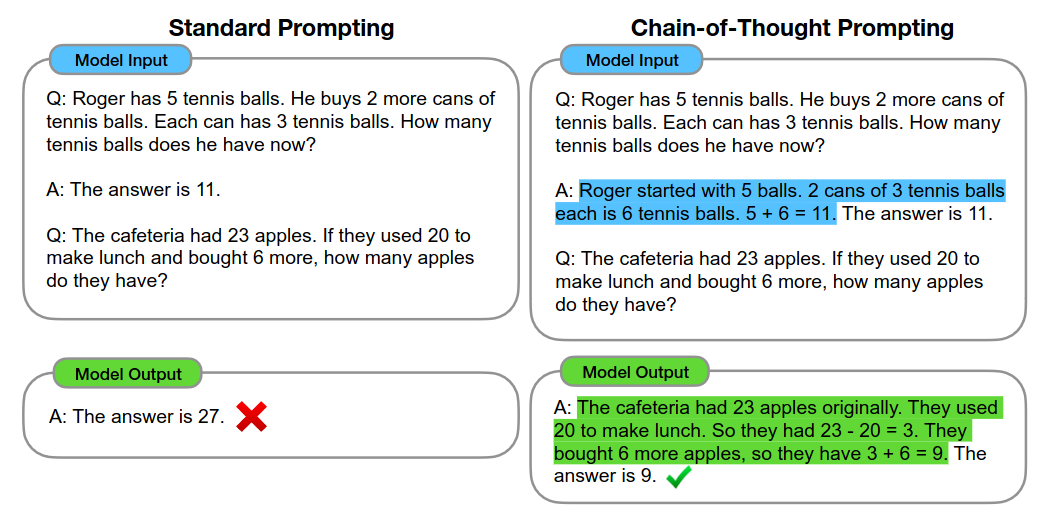

[source](https://arxiv.org/pdf/2201.11903.pdf)

### Prompting Resources

In [ ]:
Quantized LLMs # https://colab.research.google.com/drive/1ge2F1QSK8Q7h0hn3YKuBCOAS0bK8E0wf?usp=sharing#scrollTo=pDrUsbj66MGl
Prompt Engineering # https://github.com/promptslab/Awesome-Prompt-Engineering
OpenAI # https://colab.research.google.com/github/mshumer/gpt-prompt-engineer/blob/main/gpt_prompt_engineer.ipynb

## In-Class Activity

## Rest

In [ ]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
from collections import Counter
import requests
import nltk
from tqdm import tqdm
nltk.download('punkt')

In [ ]:
# Download the dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt -O tinyshakespeare.txt

# Load and preprocess the dataset
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

def build_vocab(text):
    tokens = word_tokenize(text)
    vocab = Counter(tokens)
    vocab = sorted(vocab, key=vocab.get, reverse=True)
    word_to_ix = {word: i for i, word in enumerate(vocab, 2)}
    word_to_ix['<PAD>'] = 0
    word_to_ix['<SOS>'] = 1
    ix_to_word = {i: word for word, i in word_to_ix.items()}
    return word_to_ix, ix_to_word, tokens

def encode_text(tokens, word_to_ix):
    return [word_to_ix[word] for word in tokens]

text = load_data('tinyshakespeare.txt')
word_to_ix, ix_to_word, tokens = build_vocab(text)
encoded_text = encode_text(tokens, word_to_ix)

# Hyperparameters
vocab_size = len(word_to_ix)
embed_dim = 64
hidden_dim = 128
num_layers = 2
num_epochs = 5
batch_size = 32
learning_rate = 0.005

# Dataset and DataLoader
class ShakespeareDataset(Dataset):
    def __init__(self, encoded_text, seq_length):
        self.encoded_text = encoded_text
        self.seq_length = seq_length

    def __len__(self):
        return len(self.encoded_text) - self.seq_length

    def __getitem__(self, index):
        return (torch.tensor([word_to_ix['<SOS>']] + self.encoded_text[index:index+self.seq_length-1]),
                torch.tensor(self.encoded_text[index:index+self.seq_length]))

dataset = ShakespeareDataset(encoded_text, seq_length=30)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
class LinearModel(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(LinearModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.linear = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x = self.linear(x)
        return x

class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_layers):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = x[:, -1, :]
        x = self.linear(x)
        return x

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        x, (hn, cn) = self.lstm(x)
        x = x[:, -1, :]
        x = self.linear(x)
        return x

class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, num_layers, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.pos_encoder = nn.Parameter(torch.zeros(1, 1000, embed_dim))
        self.linear = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        seq_len, N = x.size()
        positions = torch.arange(0, seq_len).unsqueeze(1).expand(seq_len, N)
        x = self.embedding(x) + self.pos_encoder[:, :seq_len]
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)
        x = self.linear(x)
        return x

In [ ]:
def train(model, dataloader, num_epochs, criterion, optimizer):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch, (inputs, targets) in tqdm(enumerate(dataloader), total=len(dataloader)):
            optimizer.zero_grad()
            outputs = model(inputs)
            outputs_reshaped = outputs.view(-1, outputs.shape[-1])
            targets_reshaped = targets.view(-1)
            loss = criterion(outputs_reshaped, targets_reshaped)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss/len(dataloader)}')

In [ ]:
# Example for the Linear model
model = LinearModel(vocab_size, embed_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train(model, dataloader, num_epochs, criterion, optimizer)

In [ ]:
def inference(model, start_sequence, word_to_ix, ix_to_word, sequence_length):
    """
    Performs inference with the language model.

    Parameters:
    - model: The trained language model.
    - start_sequence: The starting text sequence for generating new text.
    - word_to_ix: A dictionary mapping words to their integer indexes.
    - ix_to_word: A dictionary mapping integer indexes back to words.
    - sequence_length: The total length of the sequence to generate, including the start sequence.

    Returns:
    - generated_text: The generated text sequence.
    """
    model.eval()  # Put the model in evaluation mode

    # Tokenize the start sequence
    tokens = start_sequence.split()
    generated_sequence = tokens.copy()

    # Convert tokens to their indexes
    current_sequence = [word_to_ix.get(word, word_to_ix['<PAD>']) for word in tokens]

    # Generate words until we reach the desired sequence length
    while len(generated_sequence) < sequence_length:
        # Convert current sequence to tensor and add batch dimension
        sequence_tensor = torch.tensor([current_sequence], dtype=torch.long)

        # Get model output
        with torch.no_grad():
            output = model(sequence_tensor)

        # Get the last word distribution and convert to probabilities
        probabilities = torch.softmax(output[0, -1], dim=0).numpy()

        # Choose the word with the highest probability as the next word
        next_word_idx = np.argmax(probabilities)
        next_word = ix_to_word[next_word_idx]

        # Append the next word to the sequence
        generated_sequence.append(next_word)

        # Update the current sequence (considering the sequence length limit if needed)
        current_sequence.append(next_word_idx)
        if len(current_sequence) > sequence_length:  # Optional: sliding window
            current_sequence = current_sequence[1:]

    generated_text = ' '.join(generated_sequence)
    return generated_text

In [ ]:
inference(model, "He that will give good words to ", word_to_ix, ix_to_word, sequence_length=30)